## Analise Exploratoria PIA e Contas Nacionais 1967-1995

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Dados de emprego (Pesquisa Industrial Anual)

In [49]:
df_emprego.head(20)

,Variavel,Unidade,Local,ano,Indústrias extrativas e de produtos minerais,Indústria de transformação,Media_movel,Industria_tranf,Ano
0,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1966,48791,1885077,NaN,1885077,1966
1,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1967,44937,1902485,NaN,1902485,1967
2,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1968,49221,2026320,NaN,2026320,1968
3,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1969,49818,2047137,NaN,2047137,1969
4,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1973,65102,3199291,2212062.0,3199291,1973
5,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1974,63312,3396769,2514400.4,3396769,1974
6,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1976,61947,3785414,2890986.2,3785414,1976
7,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1977,66232,3950727,3275867.6,3950727,1977
8,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1978,71992,4202331,3706906.4,4202331,1978
9,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1979,72284,4375349,3942118.0,4375349,1979


In [90]:
df_emprego = pd.read_csv(r'C:\Users\13073625755\Documents\GitHub\deindustrialization_db\Dados\pesquisa_industrial_anual_1966_1995.csv',index_col=0)
df_emprego = df_emprego[df_emprego['Variavel'] == "Pessoal ocupado em 31/12 - total" ]
df_emprego['Media_movel'] = df_emprego['Indústria de transformação'].rolling(window=5).mean()
df_emprego['Industria_tranf'] = df_emprego['Indústria de transformação']
df_emprego['Ano'] = df_emprego['ano']
df_emprego = df_emprego[['Ano','Industria_tranf','Media_movel']]

df_emprego.dtypes


Ano                  int64
Industria_tranf      int64
Media_movel        float64
dtype: object

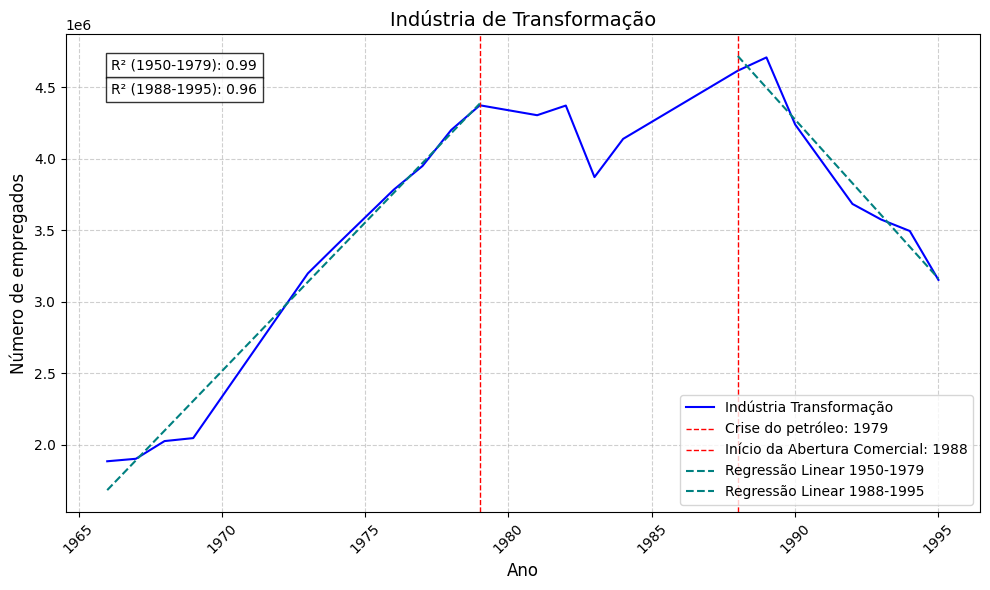

In [94]:

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(df_emprego['Ano'], df_emprego['Industria_tranf'], label='Indústria Transformação', color='blue')
#ax.plot(df_emprego['Ano'], df_emprego['Media_movel'], label='Média Móvel (5 anos)', color='orange')

# Add vertical lines for key years
key_years = [1979, 1988]
for year in key_years:
    ax.axvline(x=year, color='red', linestyle='--', linewidth=1, label=f'Crise do petróleo: {year}' if year == 1979 else f'Início da Abertura Comercial: {year}')

# Define the periods
periods = [(1950, 1979), (1988,1995)]

# Add linear regression lines for each period
for start, end in periods:
    period_data = df_emprego[(df_emprego['Ano'].astype(int) >= start) & (df_emprego['Ano'].astype(int) <= end)]
    if not period_data.empty:
        slope, intercept, _, _, _ = linregress(period_data['Ano'].astype(int), period_data['Industria_tranf'])
        ax.plot(period_data['Ano'], intercept + slope * period_data['Ano'].astype(int),color='teal', label=f'Regressão Linear {start}-{end}', linestyle='--')
        # Calculate R-squared for the regression line
        y_actual = period_data['Industria_tranf']
        y_predicted = intercept + slope * period_data['Ano'].astype(int)
        ss_total = ((y_actual - y_actual.mean()) ** 2).sum()
        ss_residual = ((y_actual - y_predicted) ** 2).sum()
        r_squared = 1 - (ss_residual / ss_total)

        # Add R-squared and intercept information to the plot for each period
        ax.text(0.05, 0.95 - 0.05 * periods.index((start, end)), 
            f'R² ({start}-{end}): {r_squared:.2f}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top', 
            bbox=dict(facecolor='white', alpha=0.8))
        
# Customize the plot
ax.set_title('Indústria de Transformação', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de empregados', fontsize=12)
ax.legend(loc='lower right')
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('emprego.svg')

plt.show()

### Participação da Indústria (Contas Nacionais)

In [5]:
df_cn = pd.read_csv(r'C:\Users\13073625755\Documents\GitHub\deindustrialization_db\Dados\contas_nacionais_1947_1995.csv', encoding='iso8859_3')
df = df_cn.loc[df_cn['Setor'] == 'Transformacao_sem_dummy', :].transpose()
df.reset_index(inplace=True)
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df['Transformacao_sem_dummy'] = df['Transformacao_sem_dummy'].fillna(0)
df = df.iloc[:-6]
df.columns = ['Ano','Industria_tranf']
df.tail()

C:\Users\13073625755\AppData\Local\Temp\ipykernel_24200\1154206026.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Transformacao_sem_dummy'] = df['Transformacao_sem_dummy'].fillna(0)


,Ano,Industria_tranf
43,1989,25.60
44,1990,25.52
45,1991,24.36
46,1992,23.17
47,1993,22.60


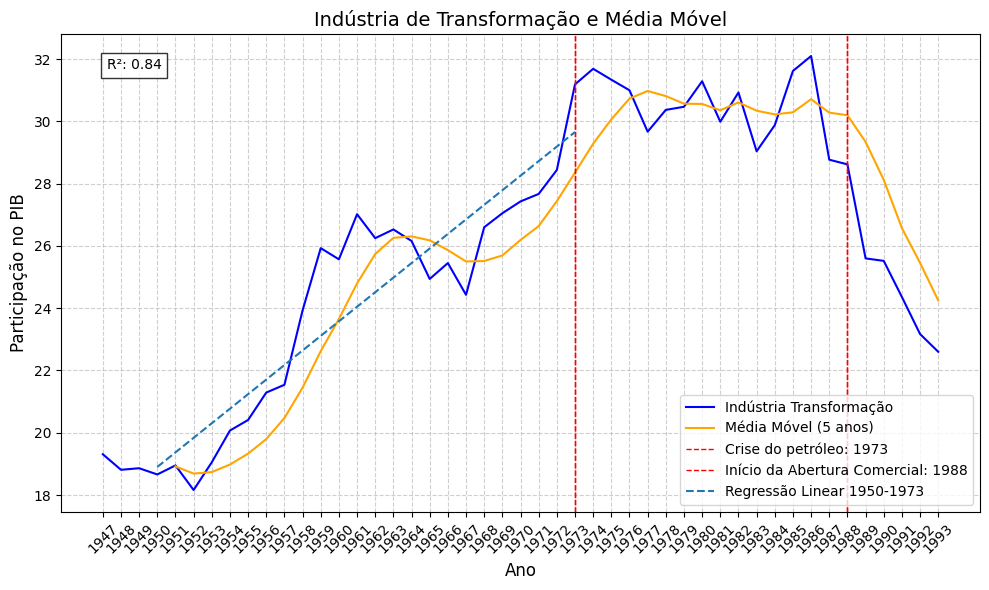

In [79]:


df['Media_movel'] = df['Industria_tranf'].rolling(window=5).mean()
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(df['Ano'], df['Industria_tranf'], label='Indústria Transformação', color='blue')
ax.plot(df['Ano'], df['Media_movel'], label='Média Móvel (5 anos)', color='orange')

# Add vertical lines for key years
key_years = [1973, 1988]
for year in key_years:
    ax.axvline(x=str(year), color='red', linestyle='--', linewidth=1, label=f'Crise do petróleo: {year}' if year == key_years[0] else None)
    ax.axvline(x=str(year), color='red', linestyle='--', linewidth=1, label=f'Início da Abertura Comercial: {year}' if year == key_years[1] else None)
    # Define the periods

periods = [(1950, 1973)]

# Add linear regression lines for each period
for start, end in periods:
    period_data = df[(df['Ano'].astype(int) >= start) & (df['Ano'].astype(int) <= end)]
    if not period_data.empty:
        slope, intercept, _, _, _ = linregress(period_data['Ano'].astype(int), period_data['Industria_tranf'])
        ax.plot(period_data['Ano'], intercept + slope * period_data['Ano'].astype(int), label=f'Regressão Linear {start}-{end}', linestyle='--')
        # Calculate R-squared for the regression line
        y_actual = period_data['Industria_tranf']
        y_predicted = intercept + slope * period_data['Ano'].astype(int)
        ss_total = ((y_actual - y_actual.mean()) ** 2).sum()
        ss_residual = ((y_actual - y_predicted) ** 2).sum()
        r_squared = 1 - (ss_residual / ss_total)

        # Add R-squared and intercept information to the plot
        ax.text(0.05, 0.95, f'R²: {r_squared:.2f}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
# Customize the plot
ax.set_title('Indústria de Transformação e Média Móvel', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Participação no PIB', fontsize=12)
ax.legend(loc='lower right')
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('industria.svg')
plt.show()


## Empregos automotivos ABC

In [29]:
df = pd.read_csv('vinculos_sf_abc.csv')

In [30]:
df.columns

Index(['Unnamed: 0', 'ano', 'sigla_uf', 'id_municipio', 'vinculo_ativo_3112',
       'cnae_2', 'cnae_1', 'valor_remuneracao_media',
       'valor_remuneracao_dezembro', 'valor_remuneracao_media_sm',
       'valor_remuneracao_dezembro_sm', 'faixa_horas_contratadas', 'idade',
       'sexo', 'raca_cor', 'grau_instrucao_1985_2005',
       'grau_instrucao_apos_2005'],
      dtype='object')

In [31]:
cnae_1 = ['25119','31429','29530','29521','34100',
          '34207','34312','34320','34410','34428',
          '34436','34444','31607','34495','34509','29726']
cnae_2 = ['22111','27228','28542','29107','29204',
          '29301','29417','29425','29433','29441',
          '29450','29492','29492','29506','30504']
cnae_1 = list(map(lambda x: float(x), cnae_1))
cnae_2 = list(map(lambda x: float(x), cnae_2))

In [32]:
cnae_2

[22111.0,
 27228.0,
 28542.0,
 29107.0,
 29204.0,
 29301.0,
 29417.0,
 29425.0,
 29433.0,
 29441.0,
 29450.0,
 29492.0,
 29492.0,
 29506.0,
 30504.0]

In [23]:
empregos_sf = df.loc[(df['sigla_uf'] == 'RJ') & 
                     (df['cnae_2'].isin(cnae_2) or df['cnae_1'].isin(cnae_1))
                     ,['ano','vinculo_ativo_3112']].groupby(by='ano').sum()
empregos_sf['Geral'] = df.loc[(df['sigla_uf'] == 'RJ'),
                     ['ano','vinculo_ativo_3112']].groupby(by='ano').sum()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
empregos_sf

In [33]:
empregos_sf = df.loc[(df['sigla_uf'] == 'RJ') & 
                     (df['cnae_2'].isin(cnae_2)),
                     ['ano','vinculo_ativo_3112']].groupby(by='ano').sum()
empregos_sf['Geral'] = df.loc[(df['sigla_uf'] == 'RJ'),
                     ['ano','vinculo_ativo_3112']].groupby(by='ano').sum()

In [34]:
empregos_abc = df.loc[(df['sigla_uf'] == 'SP') & 
                      (df['cnae_2'].isin(cnae_2)),
                      ['ano','vinculo_ativo_3112']].groupby(by='ano').sum()
empregos_abc['Geral'] = df.loc[(df['sigla_uf'] == 'SP'),
                      ['ano','vinculo_ativo_3112']].groupby(by='ano').sum()

In [35]:
empregos = pd.concat([empregos_abc,empregos_sf], axis=1)
empregos.columns = ["ABCD Paulista","ABCD Geral","Sul Fluminense","Sul Fluminense Geral"]
empregos.index = pd.to_datetime(empregos.index, format='%Y')

In [36]:
empregos

,ABCD Paulista,ABCD Geral,Sul Fluminense,Sul Fluminense Geral
ano,,,,
2014-01-01,NaN,NaN,NaN,100


<Axes: xlabel='ano'>

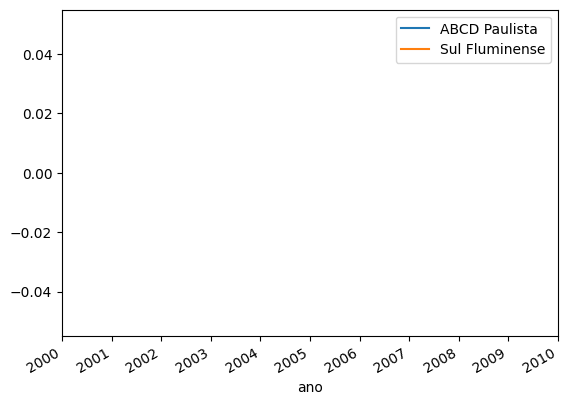

In [37]:
empregos[['ABCD Paulista','Sul Fluminense']].plot()

In [38]:
razoes = pd.DataFrame(index=pd.to_datetime(range(2006,2025), format='%Y'))
razoes['ABC'] = empregos['ABCD Paulista']/empregos['ABCD Geral']
razoes['SF'] = empregos['Sul Fluminense']/empregos['Sul Fluminense Geral']

<Axes: >

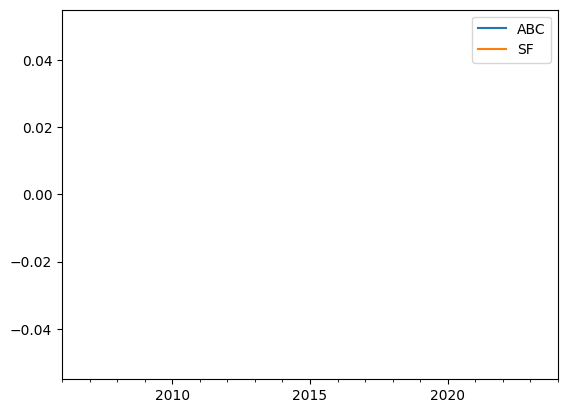

In [39]:
razoes.index = pd.to_datetime(razoes.index, format='%Y')
razoes.plot()

In [40]:
razoes

,ABC,SF
2006-01-01,NaN,NaN
2007-01-01,NaN,NaN
2008-01-01,NaN,NaN
2009-01-01,NaN,NaN
2010-01-01,NaN,NaN
2011-01-01,NaN,NaN
2012-01-01,NaN,NaN
2013-01-01,NaN,NaN
2014-01-01,NaN,NaN
2015-01-01,NaN,NaN


### Empregos Automotivos

In [4]:
df = pd.read_csv('vinculos_automotiva.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'ano', 'sigla_uf', 'id_municipio', 'vinculo_ativo_3112',
       'cnae_2', 'cnae_1', 'valor_remuneracao_media',
       'valor_remuneracao_dezembro', 'valor_remuneracao_media_sm',
       'valor_remuneracao_dezembro_sm', 'faixa_horas_contratadas', 'idade',
       'sexo', 'raca_cor', 'grau_instrucao_1985_2005',
       'grau_instrucao_apos_2005'],
      dtype='object')

In [8]:
df_estados = df.loc[:,['sigla_uf','ano','vinculo_ativo_3112',]].groupby(by=['ano','sigla_uf'], as_index=False).sum()

In [10]:
df_estados.tail()

,ano,sigla_uf,vinculo_ativo_3112
796,2024,RS,51457
797,2024,SC,28103
798,2024,SE,1805
799,2024,SP,264487
800,2024,TO,309


In [15]:
df_total = df.loc[:,['ano','vinculo_ativo_3112',]].groupby(by=['ano']).sum()

In [18]:
df_total.head(30)

,vinculo_ativo_3112
ano,
1995,329516
1996,312550
1997,310081
1998,281366
1999,278741
2000,298141
2001,298842
2002,314307
2003,327088


<Axes: xlabel='ano'>

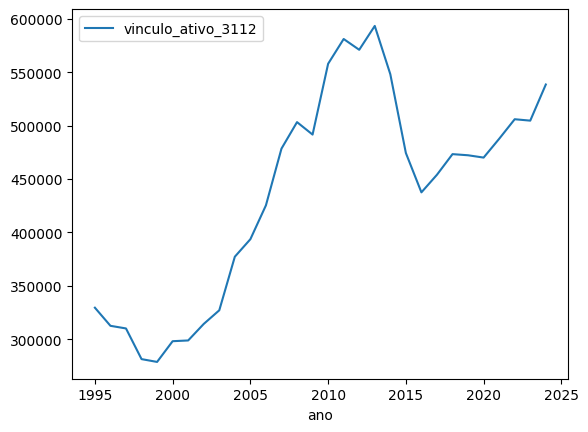

In [17]:
df_total.plot()

In [ ]:
df_total['part_abc'] = df_total['vinculo_ativo_3112']

In [52]:
import basedosdados as bd
df_brasil = bd.read_sql('''
            SELECT ano, sum(quantidade_vinculos_ativos) as vinculos
            FROM  basedosdados.br_me_rais.microdados_estabelecimentos
            WHERE ano >= 1995
            AND quantidade_vinculos_ativos > 0
            GROUP BY ano
            ORDER BY ano
            ''',
            billing_project_id='acessocaged')


Downloading: 100%|██████████|


In [68]:
df_brasil.set_index('ano', inplace=True)

In [69]:
df_total

,vinculo_ativo_3112,part_automotiva
ano,,
1995,329516,NaN
1996,312550,NaN
1997,310081,NaN
1998,281366,NaN
1999,278741,NaN
2000,298141,NaN
2001,298842,NaN
2002,314307,NaN
2003,327088,NaN


In [78]:
df_total['part_automotiva'] = df_total['vinculo_ativo_3112']/df_brasil['vinculos']

In [79]:
df_total

,vinculo_ativo_3112,part_automotiva
ano,,
1995,329516,0.013871
1996,312550,0.013116
1997,310081,0.012864
1998,281366,0.011488
1999,278741,0.011153
2000,298141,0.011367
2001,298842,0.010991
2002,314307,0.010958
2003,327088,0.011071


<Axes: xlabel='ano'>

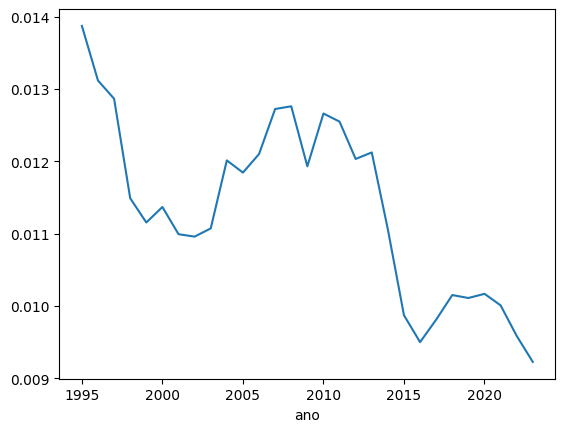

In [96]:
df_total.loc[1995:2023,'part_automotiva'].plot()

In [ ]:
_2 = ['22111','27228','28542','29107','29204',
          '29301','29417','29425','29433','29441',
          '29450','29492','29492','29506','30504']

In [109]:
import basedosdados as bd
df_29 = bd.read_sql('''
            SELECT ano, sum(quantidade_vinculos_ativos) as vinculos
            FROM  basedosdados.br_me_rais.microdados_estabelecimentos
            WHERE ano >= 1995 AND CNAE_2 IN ('29107','29204')
            AND quantidade_vinculos_ativos > 0
            GROUP BY ano
            ORDER BY ano
            ''',
            billing_project_id='acessocaged')


Downloading: 100%|██████████|


In [110]:
df_29.head(30)

,ano,vinculos
0,2006,92792
1,2007,103706
2,2008,109999
3,2009,105425
4,2010,118023
5,2011,122390
6,2012,117777
7,2013,131026
8,2014,121642
9,2015,116290


In [117]:
import basedosdados as bd
df_transf = bd.read_sql('''
            SELECT ano, sum(quantidade_vinculos_ativos) as vinculos
            FROM  basedosdados.br_me_rais.microdados_estabelecimentos
            WHERE ano >= 1995 AND CNAE_2 >= '10000' AND CNAE_2 < '34000'
            AND quantidade_vinculos_ativos > 0
            GROUP BY ano
            ORDER BY ano
            ''',
            billing_project_id='acessocaged')

Downloading: 100%|██████████|


In [113]:
df_transf.head(20)

,ano,vinculos
0,2006,6253684
1,2007,6710807
2,2008,6905074
3,2009,6932127
4,2010,7517123
5,2011,7726509
6,2012,7754545
7,2013,7900136
8,2014,7765846
9,2015,7185512


In [120]:
import basedosdados as bd
df_formal = bd.read_sql('''
            SELECT ano, sum(quantidade_vinculos_ativos) as vinculos
            FROM  basedosdados.br_me_rais.microdados_estabelecimentos
            WHERE ano >= 2006
            AND quantidade_vinculos_ativos > 0
            GROUP BY ano
            ORDER BY ano
            ''',
            billing_project_id='acessocaged')

Downloading: 100%|██████████|


In [121]:
df_formal

,ano,vinculos
0,2006,35155249
1,2007,37607430
2,2008,39441566
3,2009,41207546
4,2010,44068355
5,2011,46310631
6,2012,47458712
7,2013,48948433
8,2014,49571510
9,2015,48060807


In [122]:
df_transf/df_formal

,ano,vinculos
0,1.0,0.177888
1,1.0,0.178444
2,1.0,0.175071
3,1.0,0.168225
4,1.0,0.170579
5,1.0,0.166841
6,1.0,0.163396
7,1.0,0.161397
8,1.0,0.156659
9,1.0,0.149509
